<center> <h1> Scipy for Scientific Computation </h1> </center>
<br>
<center><img src='../images/scipy_logo.png' width='15%'> </center>
<br>
<center align="right"> Developed by: </center>
<center align="right"> Jodie Zhu </center>



----------


> SciPy is the scientific toolbox for python, aimed at mathematics, science and engineering applications

> It is built on Numpy, i.e., NumPy arrays are the most practical data type; they are generic, efficient, and straight-forward to handle

> SciPy is open-source software, compiled on top of Numpy

<h2> References </h2>

* Scipy Reference Guide https://docs.scipy.org/doc/scipy/reference/

<h2> Table of Contents </h2>

<h3> Scipy Basics </h3>
1. Linear Algebra Operations: `scipy.linalg`
2. Statistics: `scipy.stats`


---
<center><h1> $\Delta$ 1. Linear Algebra with `scipy.linalg` and `numpy`</center>

## 1.1 Vector/Matrix Basics

### Inverse

In [3]:
import numpy as np
from scipy import linalg

a = np.array([[1., 2.], [3., 4.]])
a

array([[1., 2.],
       [3., 4.]])

In [4]:
print("Inverse of the matrix")
linalg.inv(a)

Inverse of the matrix


array([[-2. ,  1. ],
       [ 1.5, -0.5]])

### Determinant

In linear algebra, the determinant is a useful value that can be computed from the elements of a square matrix. The determinant of a matrix A is denoted det(A), det A, or |A|. It can be viewed as the scaling factor of the transformation described by the matrix.

<img src='../images/determinant.png' width='50%'>
More on determinant [wikipedia](https://en.wikipedia.org/wiki/Determinant)

In [6]:
from scipy import linalg
a = np.array([[1,2], [3,4]])
linalg.det(a)


-2.0

In [162]:
a = np.array([[0,2,3], [4,5,6], [7,8,9]])
linalg.det(a)

3.000000000000001

### Trace
In linear algebra, the trace of an n-by-n square matrix A is defined to be the sum of the elements on the main diagonal

<img src='../images/trace.png' width='30%'>

More on trace [wikipedia](https://en.wikipedia.org/wiki/Trace_(linear_algebra))

In [7]:
import numpy as np
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(a)
np.trace(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


15

---
<center><h1>  $\Delta$ 2. Introduction to Statistics with `scipy.stats` and `numpy`</center>

## 2.1 Statistical Sampling


In [47]:
%matplotlib inline
import matplotlib.pylab as plt

###  Means and Confidence Intervals for Population and Sample

### Step 1: Generate random population data


In [28]:
data = np.random.randint(0, 10000, 5000)
print(data)

[1565 3566 6085 ... 1912 1621 6964]


In [23]:
len(data)

5000

### Step 2: Calculate mean
#### Calculate population mean

In [25]:
from scipy.stats import norm

print("Population Mean: {0}".format(np.mean(data)))

Population Mean: 4991.1524


#### Calculate sample mean

In [32]:
import random

sample_means = []

for i in range(500):
    sample = random.sample(list(data), 100) #generate 100 sample from population.
    sample_means.append(np.mean(sample))

#print(sample_means)
sample_means.sort()
print(len(sample_means))

500


### Step 3: Plot sample histogram

[4000, 6000, 0, 0.003]

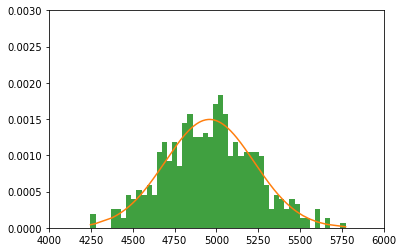

In [40]:
# Plot histograms
hist_100 = plt.hist(sample_means, bins=50, normed=1, facecolor='g', alpha=0.75)

plt.plot(sample_means, norm.pdf(sample_means,np.mean(sample_means),np.std(sample_means)))

plt.axis([4000, 6000, 0, 0.003])

----
## 2.2 Statistical Testing - Student's t-test

<img src='../images/common_test_statistics.png' width='50%'>


### Student's t-test 

The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.

A t-test is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known. When the scaling term is unknown and is replaced by an estimate based on the data, the test statistics (under certain conditions) follow a Student's t distribution. The t-test can be used, for example, to determine if two sets of data are significantly different from each other.

more on student's t-test [wiki](https://en.wikipedia.org/wiki/Student%27s_t-test)

### ** One sample t-test
**`scipy.stats.ttest_1samp()`** tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the `T statistic`, and the `p-value`

In [41]:
import pandas as pd
import scipy.stats as stats

np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


In [42]:
stats.ttest_1samp(a= minnesota_ages, popmean= population_ages.mean()) 

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

### ** Two sample t-test
[Learn more](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)

In [43]:
from scipy import stats

sample1 = np.random.normal(loc=1, scale=1, size=2000)
sample2 = np.random.normal(loc=1, scale=30, size=2000)

print("Sample 1:   {}".format(sample1))
print("Sample 1 mean: {}".format(np.mean(sample1)))
print()
print("Sample 2:   {}".format(sample2))
print("Sample 2 mean: {}".format(np.mean(sample2)))
print()
stats.ttest_ind(sample1, sample2)

Sample 1:   [ 0.54862668  0.44609722 -0.6422609  ...  2.18724991  2.18747217
  0.9695512 ]
Sample 1 mean: 0.972441768429915

Sample 2:   [ 37.99255639  19.40145065  29.48143591 ... -19.27123503  -6.76787946
  32.58332322]
Sample 2 mean: 1.4827873197167534



Ttest_indResult(statistic=-0.7441754444282659, pvalue=0.45681407667703233)

In [44]:
from scipy import stats

sample1 = np.random.normal(loc=1, scale=1, size=2000)
sample2 = np.random.normal(loc=1.2, scale=1, size=2000)

print("Sample 1:   {}".format(sample1))
print("Sample 1 mean: {}".format(np.mean(sample1)))
print()
print("Sample 2:   {}".format(sample2))
print("Sample 2 mean: {}".format(np.mean(sample2)))
print()
stats.ttest_ind(sample1, sample2)

Sample 1:   [0.11701955 1.56449669 2.87880134 ... 0.21381495 0.76437345 1.62025428]
Sample 1 mean: 1.0009342258918683

Sample 2:   [ 0.90270494  0.42871257  2.12867249 ...  1.3165168  -0.92655038
  1.11614825]
Sample 2 mean: 1.2412129368278666



Ttest_indResult(statistic=-7.60134683632753, pvalue=3.629583801027307e-14)

## 2.3 Statistical Testing - Chi-square Test
Testing if the observed frequencies comply with the given frequencies

* Chisquared Distribution [wiki](https://en.wikipedia.org/wiki/Chi-squared_distribution)

### ** Chi-square Goodness-of-fit Test
In our study of t-tests, we introduced the one-way t-test to check whether a sample mean differs from the an expected (population) mean. The chi-squared goodness-of-fit test is an analog of the one-way t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution. For example, you could use a chi-squared goodness-of-fit test to check whether the race demographics of members at your church or school match that of the entire U.S. population or whether the computer browser preferences of your friends match those of Internet uses as a whole.

In [45]:
import numpy as np
import pandas as pd
import scipy.stats as stats

#### make fake demographic data
Let's generate some fake demographic data for U.S. and Minnesota and walk through the chi-square goodness of fit test to check whether they are different:

In [48]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


In [ ]:
observed = minnesota_table
national_ratios = national_table/len(national)  # Get population ratios
expected = national_ratios * len(minnesota)   # Get expected counts

#### Perform chi-squared goodness-of-fit test automatically using the scipy function `scipy.stats.chisquare()`

In [49]:
stats.chisquare(f_obs= observed['count'],   # Array of observed counts
                f_exp= expected['count'])   # Array of expected counts

Power_divergenceResult(statistic=18.194805194805177, pvalue=0.0011304670928034746)

Since our chi-squared statistic exceeds the critical value, we'd reject the null hypothesis that the two distributions are the same.

### ** Chi-square test of independence

The chi-squared test of independence tests whether two categorical variables are independent. The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race and religion.

## 3.5 Pearson Correlation

Pearson Correlation Coefficient for Population

<img src="../images/pearson_correlation_for_population.png" width="30%" align="left">              
           

Pearson Correlation Coefficient for **Sample**  

<img src="../images/pearson_correlation_for_sample.png" width="40%" align="left">   

Correlation Coefficient: [[1.         0.85562983]
 [0.85562983 1.        ]]


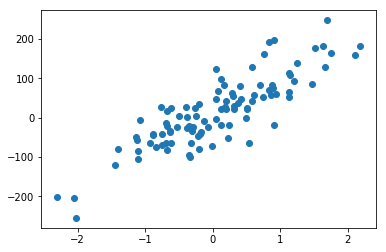

In [55]:
from sklearn import datasets
import numpy as np

X, y, coef = datasets.make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=50,
                                      coef=True, random_state=1)

x = X.reshape(len(X),)
y = y.reshape(len(y),)

plt.scatter(x,y)
print("Correlation Coefficient: {0}".format(np.corrcoef(x,y)[0][1]))

In [56]:
##############################################
# Calculate Pearson Correlation Coefficient
##############################################

# Covariance
cov_xy = np.sum((x - np.mean(x))*(y - np.mean(y)))

# Standard Deviation
x_std = np.std(x)
y_std = np.std(y)

# Pearson Correlation
r = cov_xy / (x_std * y_std) / 100

print("Pearson Correlation: {0}".format(r))

Pearson Correlation: 0.8556298298430332


In [57]:
##############################################
# Pearson Correlation Coefficient with Numpy
##############################################
np.corrcoef(x,y)

array([[1.        , 0.85562983],
       [0.85562983, 1.        ]])